FINANCE & ACCOUNTING COURSES ANALYSIS FROM UDEMY (13K+ COURSES)


This project takes a close look at over 13,000 finance and accounting courses on Udemy. It analyzes everything from course prices, ratings, and reviews to discounts and how many people are enrolling. The goal is to understand what makes certain courses more popular or valuable. Along the way, it explores trends over time, compares free and paid courses, and even uses machine learning to predict course success. It's a data-driven deep dive into the world of online learning in finance and accounting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# =======<<<<<< Load Excel File >>>>>>=======
file_path = 'udemy_output_All_Finance__Accounting_p1_p626.xlsx'
df = pd.read_excel(file_path)

# Basic info
print("Initial dataset shape:", df.shape)
print("Column names:", df.columns)


Initial dataset shape: (13608, 20)
Column names: Index(['id', 'title', 'url', 'is_paid', 'num_subscribers', 'avg_rating',
       'avg_rating_recent', 'rating', 'num_reviews', 'is_wishlisted',
       'num_published_lectures', 'num_published_practice_tests', 'created',
       'published_time', 'discount_price__amount', 'discount_price__currency',
       'discount_price__price_string', 'price_detail__amount',
       'price_detail__currency', 'price_detail__price_string'],
      dtype='object')


In [3]:
# Remove duplicate courses
df = df.drop_duplicates(subset="title")

# =======<<<<<< Clean Missing Data >>>>>>=======
df = df.dropna(subset=["price_detail__amount", "num_subscribers", "num_reviews", "published_time"])



In [4]:
# Convert published_time to datetime
df['published_time'] = pd.to_datetime(df['published_time'])

# Extract year and month
df['year'] = df['published_time'].dt.year
df['month'] = df['published_time'].dt.month

# Use price column
df['price'] = df['price_detail__amount'].astype(float)

# Free vs Paid courses
df['is_paid'] = df['price'] > 0



In [5]:
# Summary statistics
print("Total Courses:", df.shape[0])
print("Free vs Paid:\n", df['is_paid'].value_counts())


Total Courses: 13074
Free vs Paid:
 is_paid
True    13074
Name: count, dtype: int64


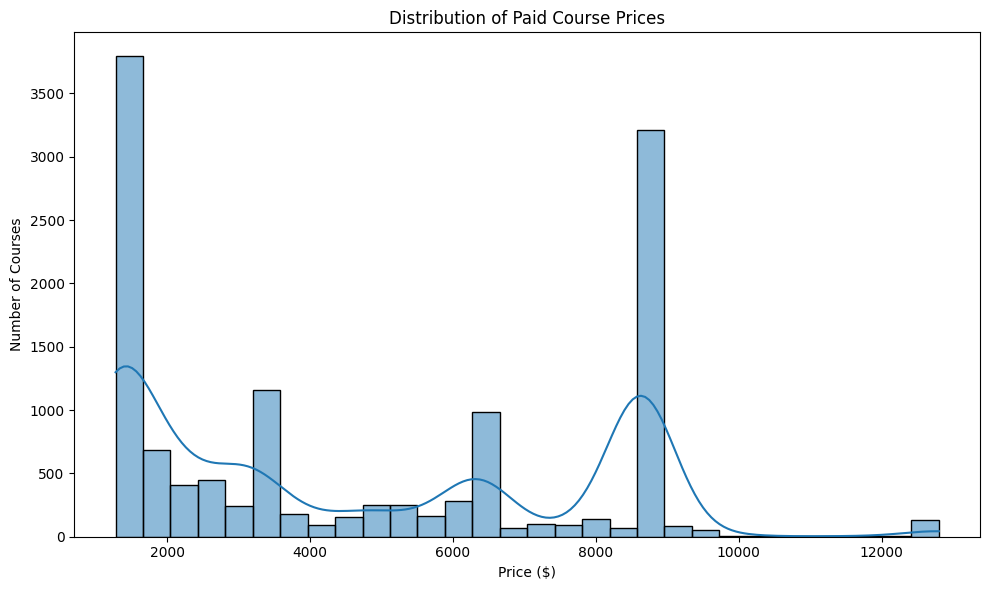

In [6]:
# 1. Distribution of course prices
plt.figure(figsize=(10, 6))
sns.histplot(df[df['price'] > 0]['price'], bins=30, kde=True)
plt.title("Distribution of Paid Course Prices")
plt.xlabel("Price ($)")
plt.ylabel("Number of Courses")
plt.tight_layout()
plt.show()


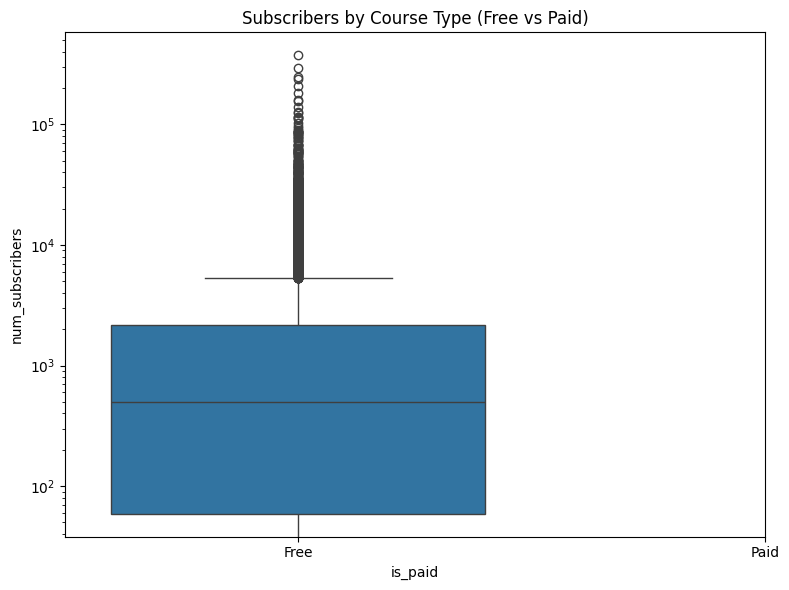

In [7]:
# 2. Subscribers: Free vs Paid
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_paid', y='num_subscribers', data=df)
plt.yscale('log')
plt.xticks([0, 1], ['Free', 'Paid'])
plt.title("Subscribers by Course Type (Free vs Paid)")
plt.tight_layout()
plt.show()



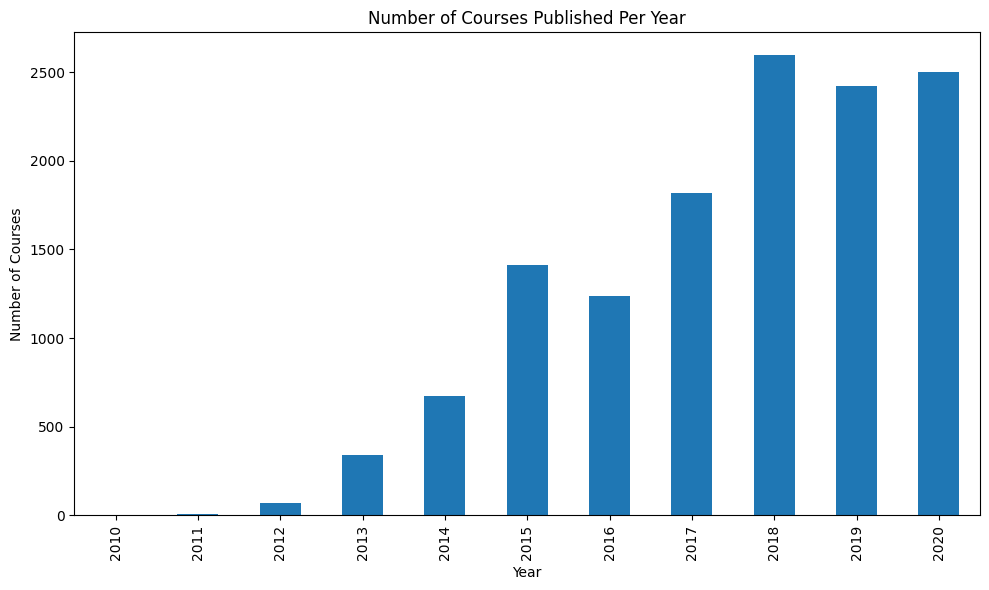

In [8]:
# =======<<<<<< Yearly Publishing Trend >>>>>>=======
plt.figure(figsize=(10, 6))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Courses Published Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Courses")
plt.tight_layout()
plt.show()


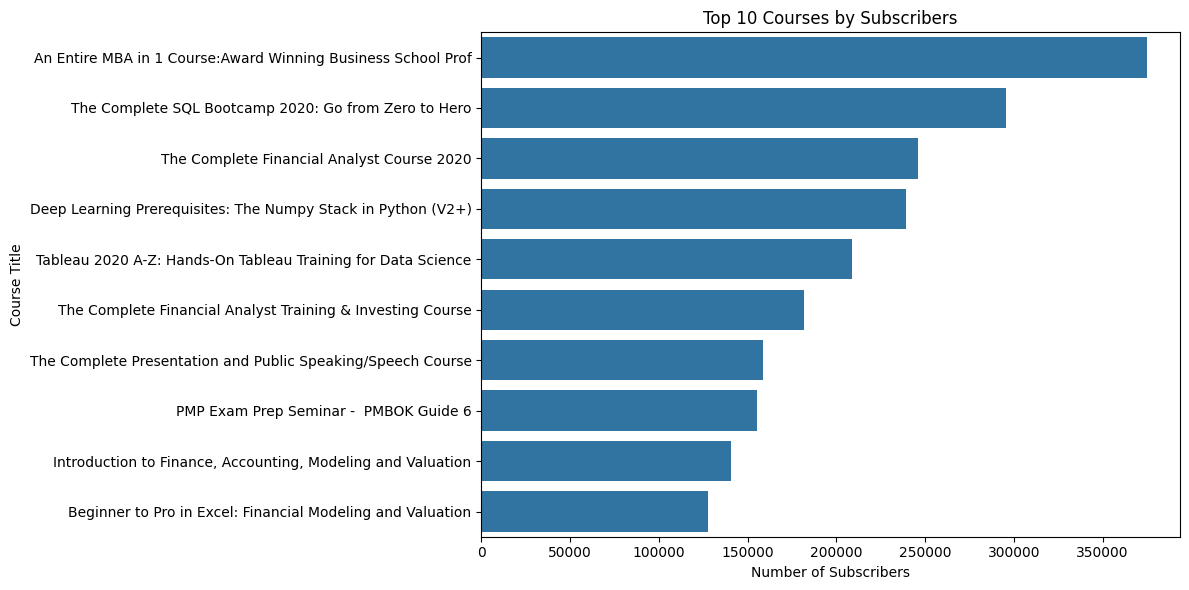

In [9]:
# 4. Top 10 courses by number of subscribers
top_courses = df.sort_values(by='num_subscribers', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='num_subscribers', y='title', data=top_courses)
plt.title("Top 10 Courses by Subscribers")
plt.xlabel("Number of Subscribers")
plt.ylabel("Course Title")
plt.tight_layout()
plt.show()


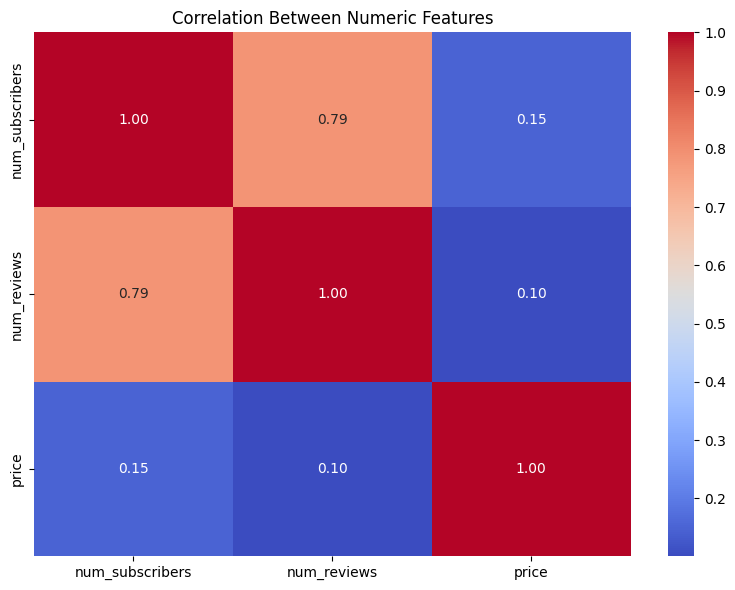

In [10]:
# =======<<<<<< Correlation Matrix >>>>>>=======
numeric_cols = ['num_subscribers', 'num_reviews', 'price']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.tight_layout()
plt.show()